**Marketing Campaign for Banking Products**

We have data for the customers of the bank. Our aim is to build a modlel to help the bank to identify the potential customers who have higher probability of purchasing the loan.

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the data**

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [4]:
data.shape

(5000, 14)

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
data['Experience'].corr(data['Age'])

0.9942148569683321

In [10]:
corr = data.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


**Cleaning data**

In [11]:
data = data.drop(['ID','Experience'],axis=1)

**EXPLORATORY DATA ANALYSIS**

In [12]:
data.nunique(axis=0)

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [13]:
l = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in l:
    print(col)
    print(data[col].value_counts())
    print("**"*20)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
****************************************
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
****************************************
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
****************************************
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
****************************************
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
****************************************
Online
1    2984
0    2016
Name: Online, dtype: int64
****************************************
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
****************************************


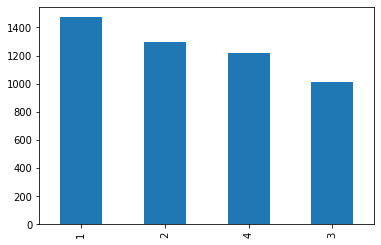

In [14]:
data['Family'].value_counts().plot(kind = 'bar')

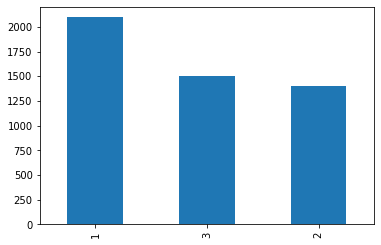

In [15]:
data['Education'].value_counts().plot(kind = 'bar')

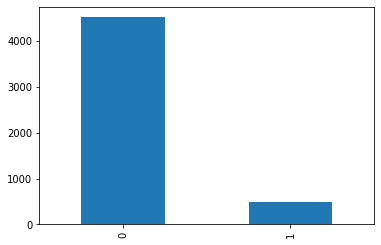

In [16]:
data['Personal Loan'].value_counts().plot(kind = 'bar')

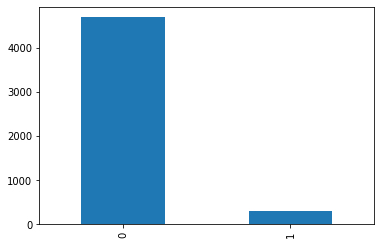

In [17]:
data['CD Account'].value_counts().plot(kind = 'bar')

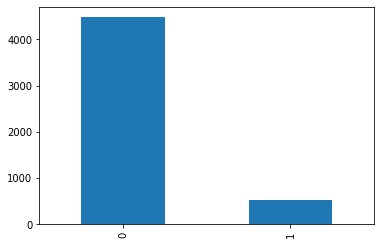

In [18]:
data['Securities Account'].value_counts().plot(kind = 'bar')

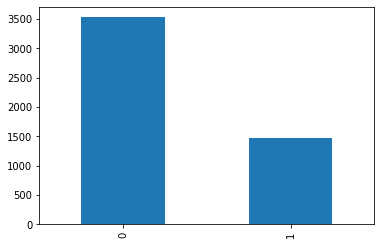

In [19]:
data['CreditCard'].value_counts().plot(kind = 'bar')

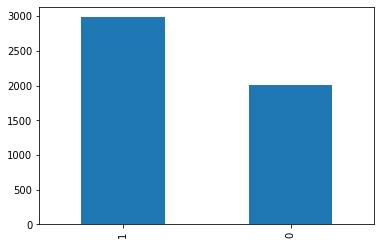

In [20]:
data['Online'].value_counts().plot(kind = 'bar')

In [21]:
data=data.drop('ZIP Code',axis = 1)

In [22]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


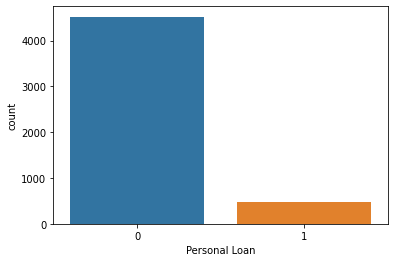

In [23]:
sns.countplot(data['Personal Loan'])

In [24]:
sum(data['CCAvg']==0)

106

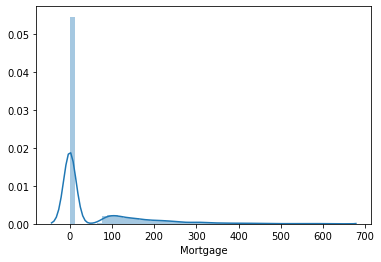

In [25]:
sns.distplot(data['Mortgage'])

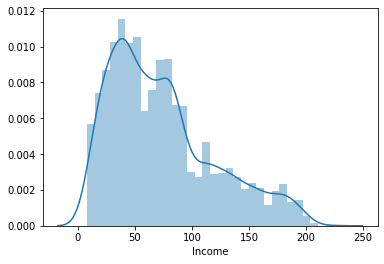

In [26]:
sns.distplot(data.Income)

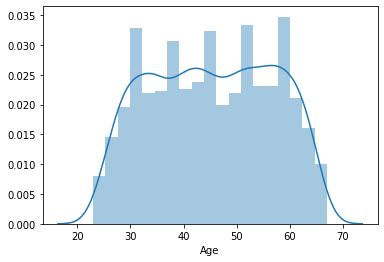

In [27]:
sns.distplot(data.Age)

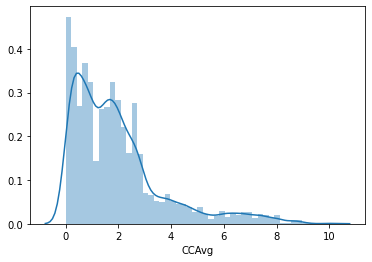

In [28]:
sns.distplot(data.CCAvg)

In [29]:
sum(data['Mortgage']==0)

3462

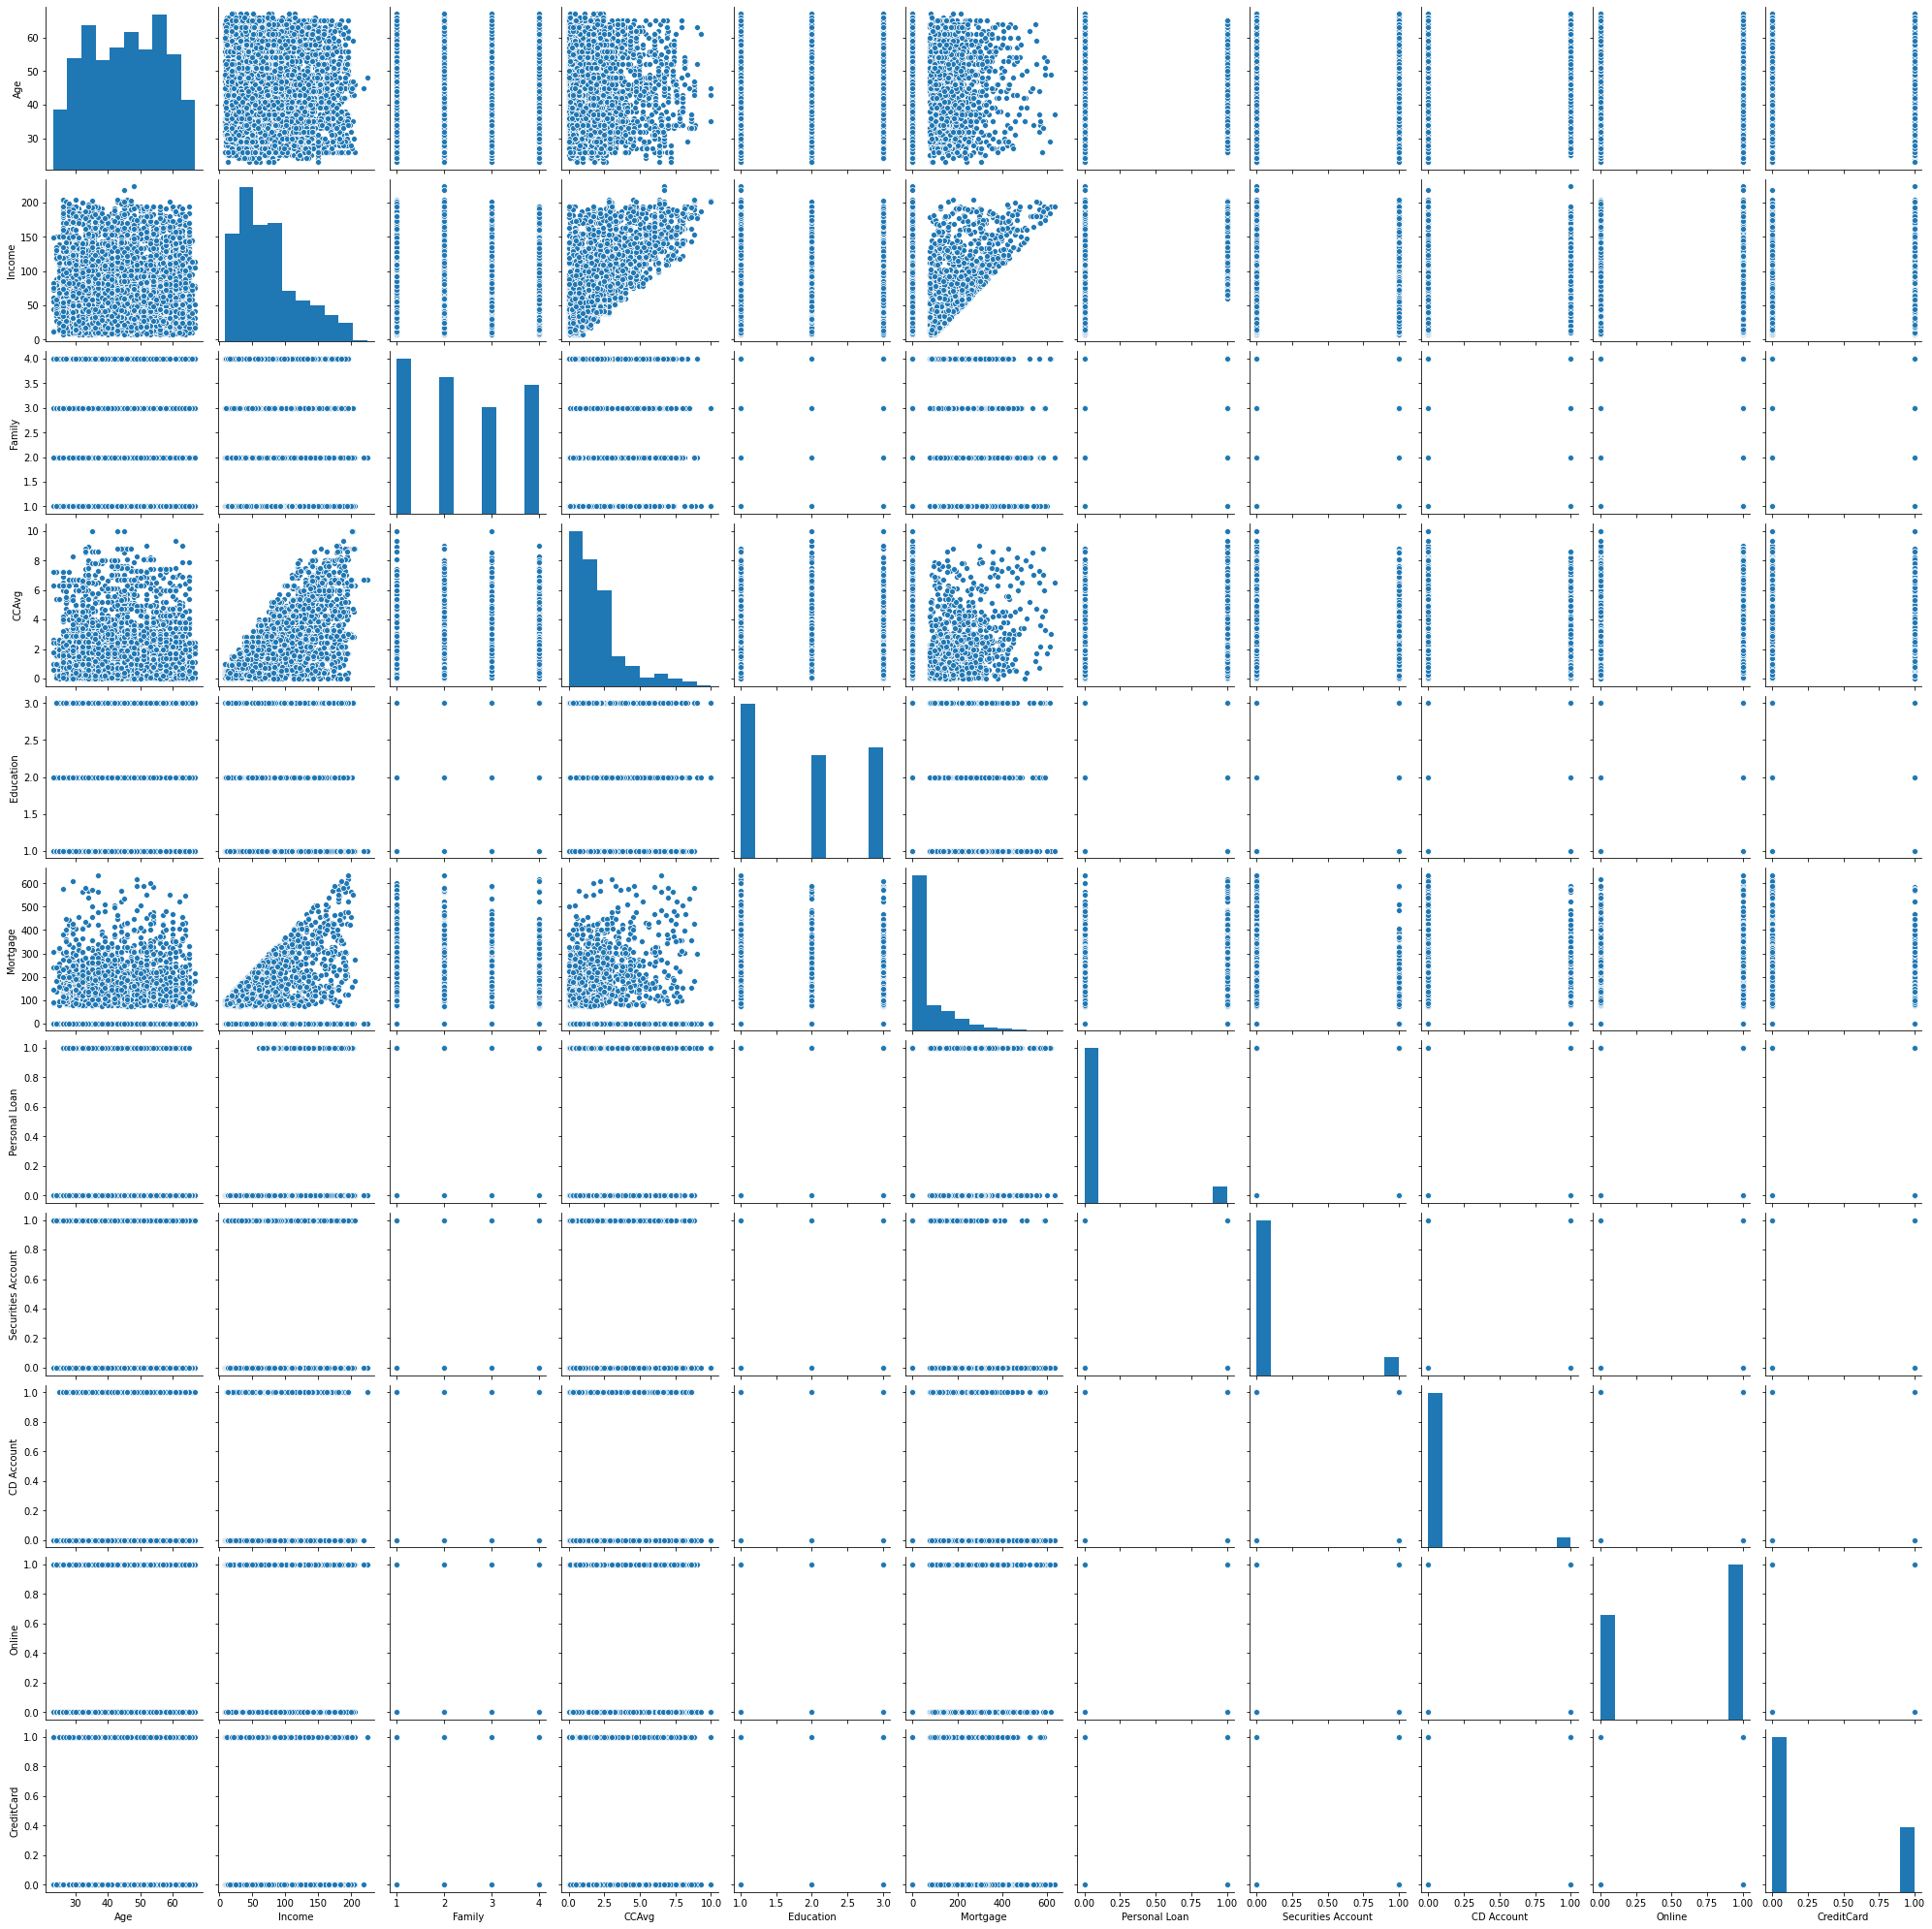

In [30]:
sns.pairplot(data)

In [31]:
sum(data.duplicated()==True)

13

Text(0, 0.5, 'education')

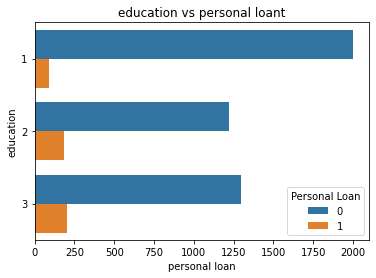

In [32]:
sns.countplot(y = 'Education', data = data, hue = 'Personal Loan')
plt.title('education vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('education')

Text(0, 0.5, 'security account')

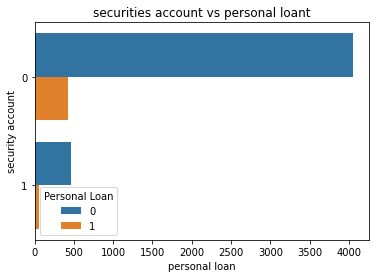

In [33]:
sns.countplot(y = 'Securities Account', data = data, hue = 'Personal Loan')
plt.title('securities account vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('security account')

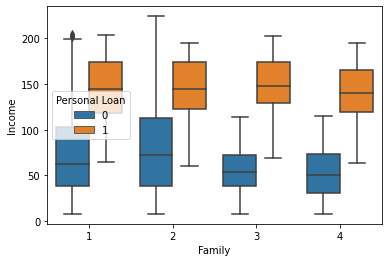

In [34]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data = data)

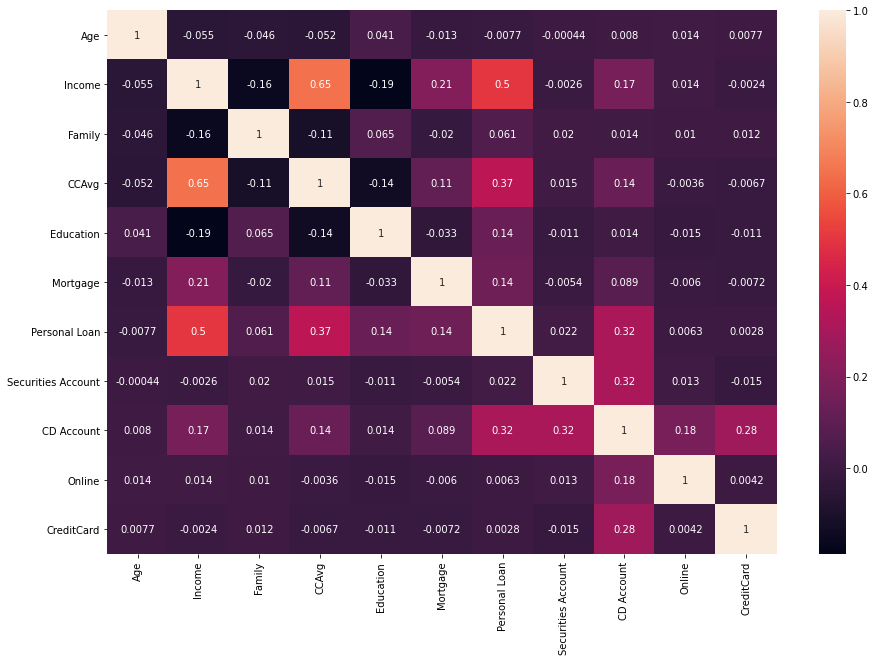

In [35]:
plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(),annot = True)

In [36]:
x = data[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = data['Personal Loan'].values

**FEATURE SCALING AND TRANSFORMATION**

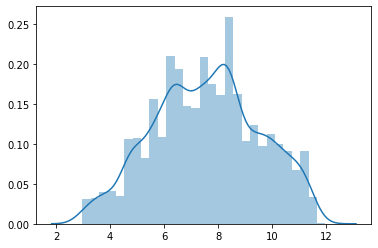

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))

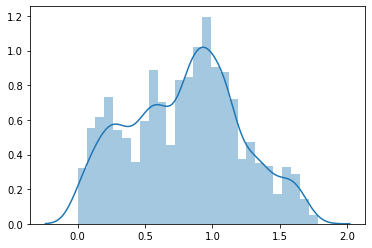

In [38]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))

**TRAINING AND TESTING DATA**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.55018051,
        -0.33649896, -0.24878345],
       [ 0.85873161,  0.16296952, -0.34389746, ..., -0.55018051,
         2.97177736, -0.24878345],
       [ 0.24827071,  1.18631137, -1.21736706, ..., -0.55018051,
         2.97177736, -0.24878345],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ...,  0.47220403,
        -0.33649896, -0.24878345],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.55018051,
        -0.33649896, -0.24878345],
       [-0.01335539, -0.33781479,  0.52957214, ..., -0.55018051,
         2.97177736, -0.24878345]])

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = model.predict(x_test)

In [43]:
from sklearn import metrics

In [44]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

MAE: 0.056666666666666664
R2 score: 0.3470378564405112


In [45]:
print(metrics.accuracy_score(y_test,y_pred))

0.9433333333333334


In [46]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.946


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1328   28]
 [  57   87]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.76      0.60      0.67       144

    accuracy                           0.94      1500
   macro avg       0.86      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



**DECISION TREE:**

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [50]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

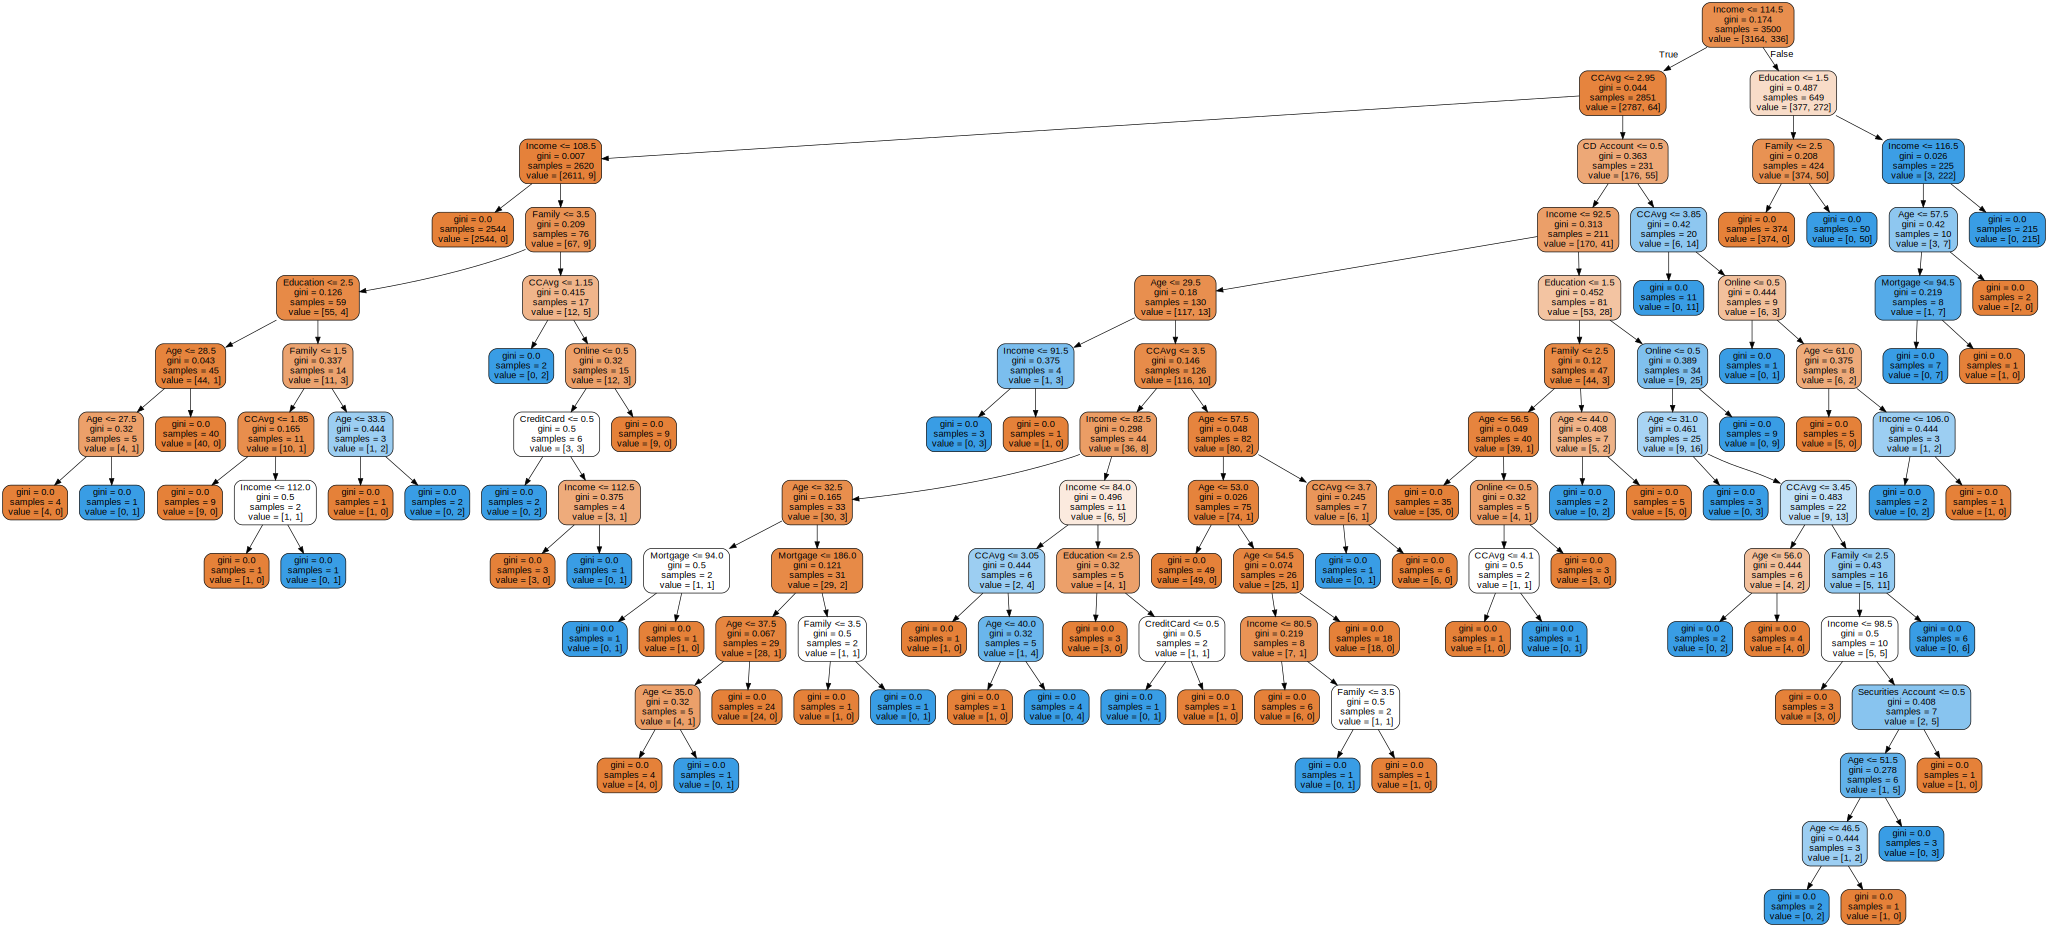

In [51]:
graph

In [52]:
y_pred = clf.predict(x_test)

In [53]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.019333333333333334
R2 score: 0.777224680432645
Accuracy score for test data 0.9806666666666667


In [54]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.946


In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1342   14]
 [  15  129]]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**RANDOM FOREST**

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred = clf.predict(x_test)

In [59]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.012
R2 score: 0.8617256637168141
Accuracy score for test data 0.988


In [60]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.946


In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1352    4]
 [  14  130]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



**KNN algorithm**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [65]:
y_pred = neigh.predict(x_test)

In [66]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.07933333333333334
R2 score: 0.08585299901671573
Accuracy score for test data 0.9206666666666666


In [67]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.946


In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1319   37]
 [  82   62]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1356
           1       0.63      0.43      0.51       144

    accuracy                           0.92      1500
   macro avg       0.78      0.70      0.73      1500
weighted avg       0.91      0.92      0.91      1500



**CONCLUSION:**

In the first step of this project we imported various libraries and our data. Than we found out various things about our data.

1)We have to make the model to predict whether a person will take personal loan or not.
2)We found that age and experience are highly correlated so we droped the experience column.    
3)ID and ZIPcode were not contributing factors for a person to take loan so we dropped them.  
4)The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.  
5)The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.

After this we used several models to make predictions.

                            RANDOM FOREST

ACCURACY SCORE: 98.46%

CONFUSION MATRIX: [[1353 3][ 20 124]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.99      1.00      0.99      1356
                   1       0.98      0.86      0.92       144

             accuracy                           0.98      1500
            macro avg       0.98      0.93      0.95      1500
         weighted avg       0.98      0.98      0.98      1500

                                  DECISION TREE

ACCURACY SCORE: 97.9%

CONFUSION MATRIX: [[1339 17][ 14 130]]

CLSSIFICATION REPORT: precision recall f1-score support

                   0       0.99      0.99      0.99      1356
                   1       0.88      0.90      0.89       144

            accuracy                           0.98      1500
           macro avg       0.94      0.95      0.94      1500
        weighted avg       0.98      0.98      0.98      1500

                                   KNN

ACCURACY SCORE: 92.7%

CONFUSION MATRIX: [[1324 32][ 77 67]]

CLASSIFICATION REPORT: precision recall f1-score support

                           0       0.95      0.98      0.96      1356
                           1       0.68      0.47      0.55       144

                    accuracy                           0.93      1500
                   macro avg       0.81      0.72      0.76      1500
                weighted avg       0.92      0.93      0.92      1500


                              LOGISTIC REGRESSION 

ACCURACY SCORE: 94.94%

CONFUSION MATRIX: [[1338 18][ 59 85]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.96      0.99      0.97      1356
                   1       0.83      0.59      0.69       144

            accuracy                           0.95      1500
           macro avg       0.89      0.79      0.83      1500
        weighted avg       0.95      0.95      0.94      1500